# Exploratory Data Analysis (EDA)

This notebook explores the lung cancer CT scan dataset to understand:
- Dataset structure and distribution
- Image characteristics (size, format, quality)
- Class distribution and potential imbalance
- Sample visualizations

In [1]:
# Import libraries
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from pathlib import Path

# Add parent directory to path
sys.path.insert(0, os.path.abspath('..'))

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

print("Libraries imported successfully!")

Libraries imported successfully!


## Dataset Structure

In [2]:
# TODO: Update this path to point to your dataset
DATA_DIR = "../data/raw"

# Check if data directory exists
if os.path.exists(DATA_DIR):
    classes = ['normal', 'benign', 'malignant']
    
    print("Dataset Structure:")
    print("=" * 60)
    
    # Count images per class
    class_counts = {}
    for class_name in classes:
        class_dir = os.path.join(DATA_DIR, class_name)
        if os.path.exists(class_dir):
            images = [f for f in os.listdir(class_dir) 
                     if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
            class_counts[class_name] = len(images)
            print(f"{class_name.capitalize()}: {len(images)} images")
        else:
            class_counts[class_name] = 0
            print(f"{class_name.capitalize()}: Directory not found")
    
    print("=" * 60)
else:
    print(f"Data directory not found at {DATA_DIR}")
    print("Please download the dataset and organize it as described in ../data/README.md")
    class_counts = {'normal': 0, 'benign': 0, 'malignant': 0}

Dataset Structure:
Normal: 416 images
Benign: 120 images
Malignant: 561 images


## Class Distribution

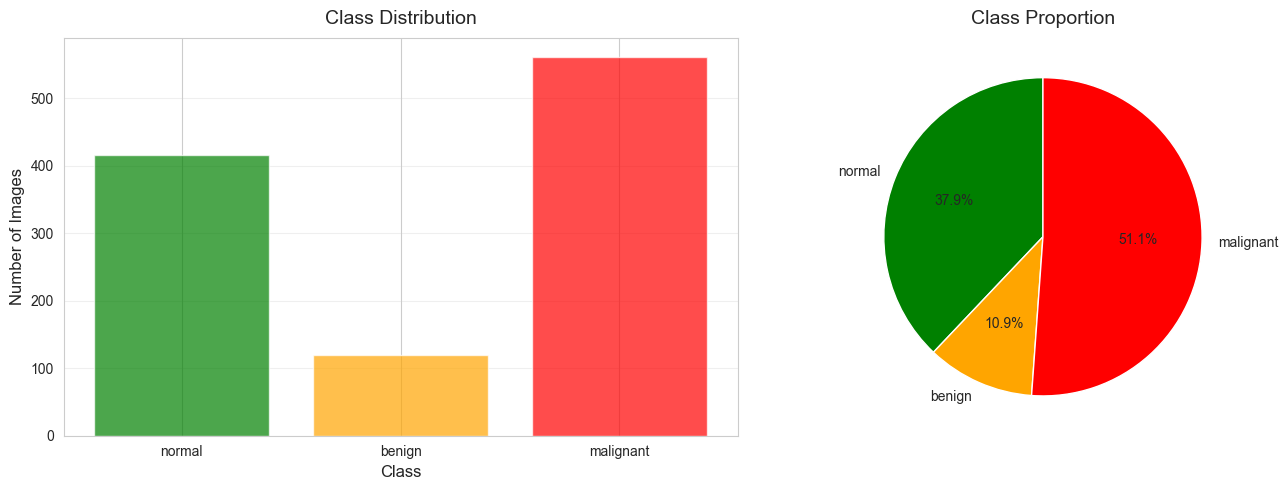


Total images: 1097
Normal: 416 (37.9%)
Benign: 120 (10.9%)
Malignant: 561 (51.1%)


In [3]:
# Visualize class distribution
if sum(class_counts.values()) > 0:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Bar plot
    axes[0].bar(class_counts.keys(), class_counts.values(), 
                color=['green', 'orange', 'red'], alpha=0.7)
    axes[0].set_title('Class Distribution', fontsize=14, pad=10)
    axes[0].set_xlabel('Class', fontsize=12)
    axes[0].set_ylabel('Number of Images', fontsize=12)
    axes[0].grid(axis='y', alpha=0.3)
    
    # Pie chart
    axes[1].pie(class_counts.values(), labels=class_counts.keys(), 
               autopct='%1.1f%%', colors=['green', 'orange', 'red'],
               startangle=90)
    axes[1].set_title('Class Proportion', fontsize=14, pad=10)
    
    plt.tight_layout()
    plt.show()
    
    # Check for class imbalance
    total = sum(class_counts.values())
    print(f"\nTotal images: {total}")
    if total > 0:
        for class_name, count in class_counts.items():
            percentage = (count / total) * 100
            print(f"{class_name.capitalize()}: {count} ({percentage:.1f}%)")

## Sample Images Visualization

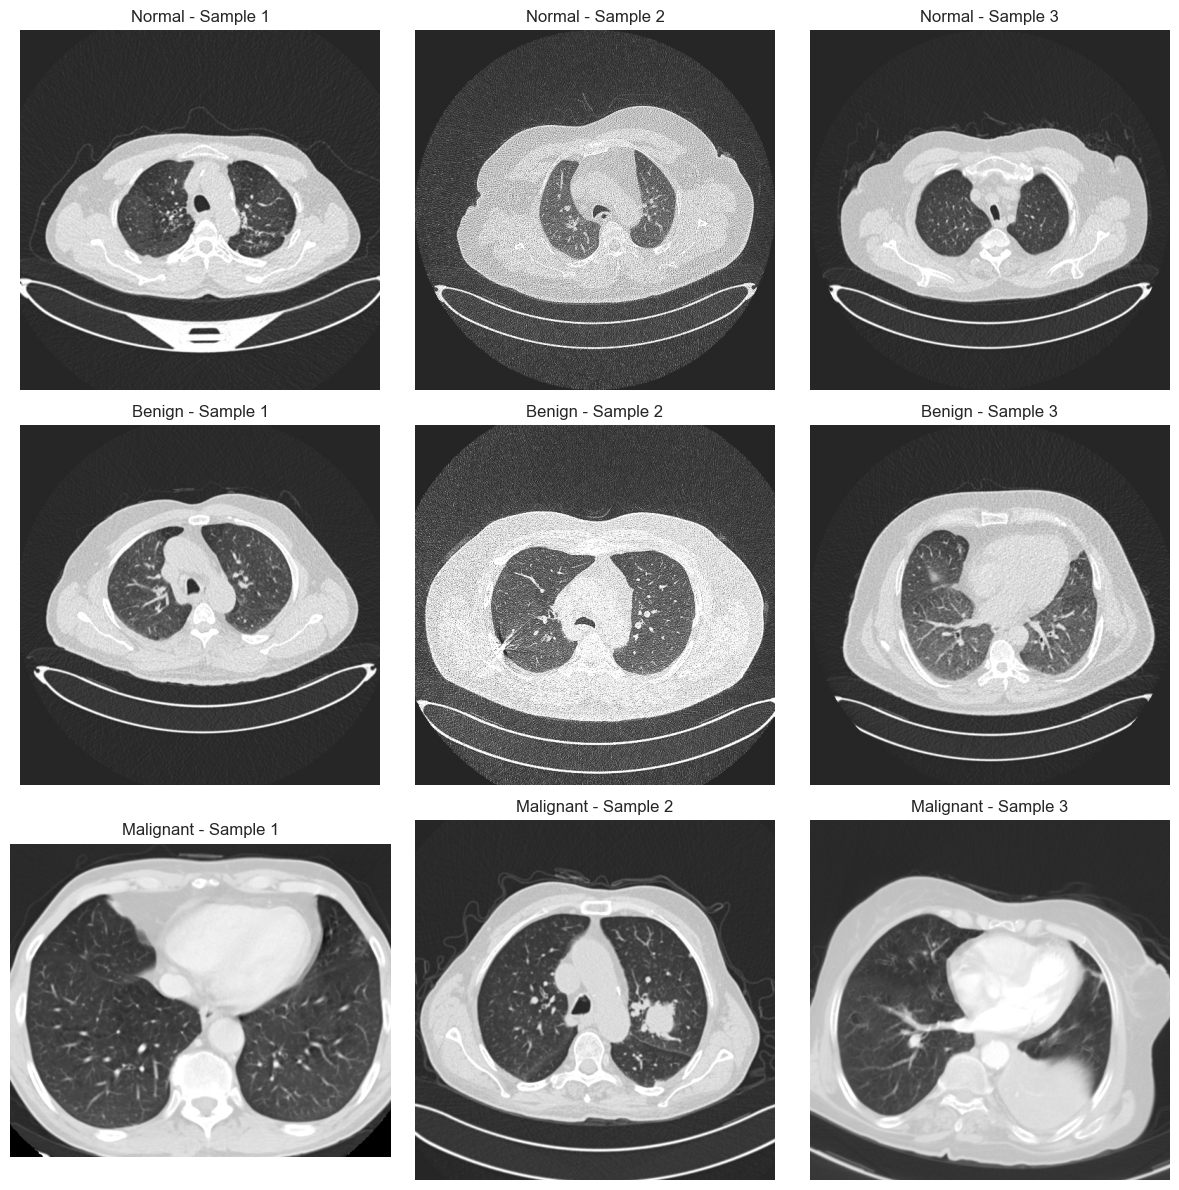

In [4]:
# Display sample images from each class
if os.path.exists(DATA_DIR) and sum(class_counts.values()) > 0:
    fig, axes = plt.subplots(3, 3, figsize=(12, 12))
    
    for idx, class_name in enumerate(classes):
        class_dir = os.path.join(DATA_DIR, class_name)
        if os.path.exists(class_dir):
            images = [f for f in os.listdir(class_dir) 
                     if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
            
            if images:
                # Show 3 samples per class
                for j in range(3):
                    if j < len(images):
                        img_path = os.path.join(class_dir, images[j])
                        try:
                            img = Image.open(img_path).convert('RGB')
                            axes[idx, j].imshow(img)
                            axes[idx, j].set_title(f"{class_name.capitalize()} - Sample {j+1}")
                            axes[idx, j].axis('off')
                        except Exception as e:
                            axes[idx, j].text(0.5, 0.5, f"Error loading image\\n{str(e)}",
                                            ha='center', va='center')
                            axes[idx, j].axis('off')
    
    plt.tight_layout()
    plt.show()
else:
    print("Cannot display samples: dataset not found")

## Image Statistics

Analyze image dimensions, formats, and basic statistics.

Image Statistics:
            width  height
count  150.000000   150.0
mean   517.333333   512.0
std     35.465962     0.0
min    512.000000   512.0
25%    512.000000   512.0
50%    512.000000   512.0
75%    512.000000   512.0
max    801.000000   512.0

Format Distribution:
format
JPEG    150
Name: count, dtype: int64

Mode Distribution:
mode
RGB    150
Name: count, dtype: int64


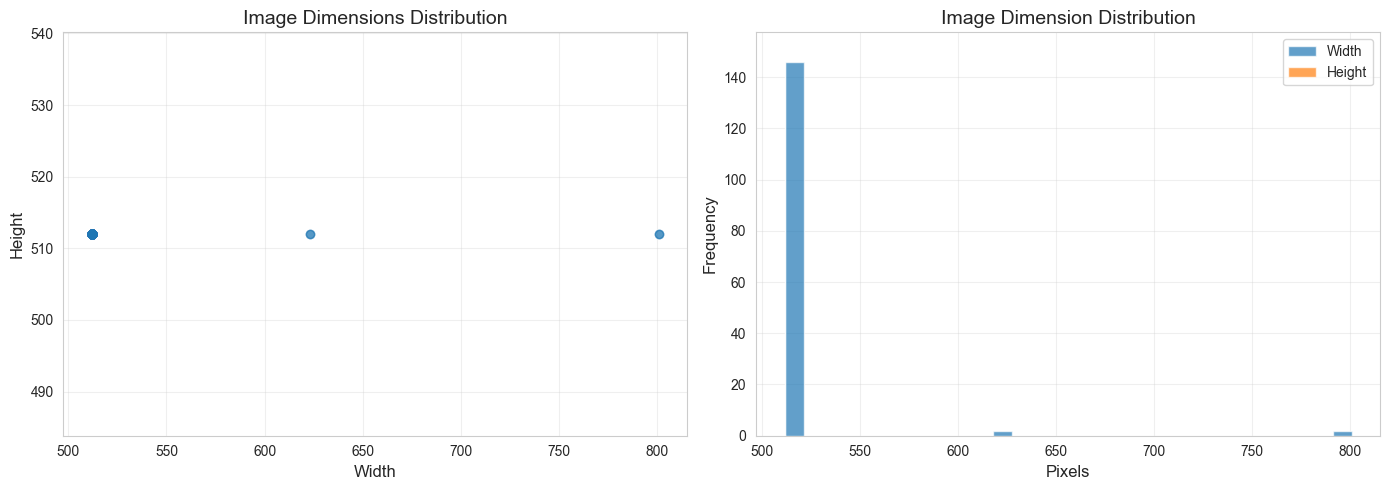

In [5]:
# Analyze image dimensions and statistics
if os.path.exists(DATA_DIR) and sum(class_counts.values()) > 0:
    image_stats = []
    
    for class_name in classes:
        class_dir = os.path.join(DATA_DIR, class_name)
        if os.path.exists(class_dir):
            images = [f for f in os.listdir(class_dir) 
                     if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
            
            for img_name in images[:50]:  # Sample first 50 images per class
                img_path = os.path.join(class_dir, img_name)
                try:
                    img = Image.open(img_path)
                    image_stats.append({
                        'class': class_name,
                        'width': img.size[0],
                        'height': img.size[1],
                        'format': img.format,
                        'mode': img.mode
                    })
                except Exception as e:
                    continue
    
    if image_stats:
        df_stats = pd.DataFrame(image_stats)
        
        print("Image Statistics:")
        print("=" * 60)
        print(df_stats.describe())
        print("\nFormat Distribution:")
        print(df_stats['format'].value_counts())
        print("\nMode Distribution:")
        print(df_stats['mode'].value_counts())
        
        # Visualize image dimensions
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))
        
        axes[0].scatter(df_stats['width'], df_stats['height'], alpha=0.5)
        axes[0].set_xlabel('Width', fontsize=12)
        axes[0].set_ylabel('Height', fontsize=12)
        axes[0].set_title('Image Dimensions Distribution', fontsize=14)
        axes[0].grid(True, alpha=0.3)
        
        axes[1].hist(df_stats['width'], bins=30, alpha=0.7, label='Width')
        axes[1].hist(df_stats['height'], bins=30, alpha=0.7, label='Height')
        axes[1].set_xlabel('Pixels', fontsize=12)
        axes[1].set_ylabel('Frequency', fontsize=12)
        axes[1].set_title('Image Dimension Distribution', fontsize=14)
        axes[1].legend()
        axes[1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
else:
    print("Cannot analyze image statistics: dataset not found")